#### Shreya Sabharwal

In [53]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 load the data

In [14]:
yrbs = pd.read_table('yrbs.tsv.bz2')
print(yrbs.head())
print(yrbs.shape)
print(yrbs.year.unique())
print(yrbs.age.unique())
print(yrbs.sex.unique())
print(yrbs.meth.unique())
print(yrbs.tv.unique())
print(yrbs.state.unique())


   year  age sex  meth  tv state
0  2003   13   M     0   1    XX
1  2003   13   M     1   1    XX
2  2003   13   M     1   1    XX
3  2003   13   M     0   1    XX
4  2003   13   M     0   0    XX
(58077, 6)
[2003 2005 2007 2009]
[13 14 15 16 17]
['M' 'F']
[0 1]
[1 0]
['XX' 'MT']


Dimension: 58077, 6

In [17]:
yrbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58077 entries, 0 to 58076
Data columns (total 6 columns):
year     58077 non-null int64
age      58077 non-null int64
sex      58077 non-null object
meth     58077 non-null int64
tv       58077 non-null int64
state    58077 non-null object
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


there are no missing values

### 1.2 graphical exploration

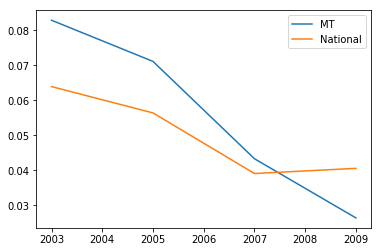

In [43]:
ym = yrbs.groupby(['year', 'state']).meth.mean().reset_index()
plt.plot(ym.year[ym.state=='MT'], ym.meth[ym.state=='MT'], label='MT')
plt.plot(ym.year[ym.state=='XX'], ym.meth[ym.state=='XX'], label='National')
plt.legend()

There is a sharp decline for meth use in Montana. The entire country didn't see the same decline.

### 1.3 Before-After

In [23]:
yrbs['before'] = [1 if(i==2003 or i==2005) else 0 for i in yrbs.year]

In [44]:
print(yrbs[yrbs.state == 'MT'].groupby('before').meth.mean())
m = smf.ols(formula = 'meth ~ before', data = yrbs[yrbs.state == 'MT'])
print(m.fit().summary())

before
0    0.038115
1    0.076734
Name: meth, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.19e-16
Time:                        19:39:19   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Year of 2003 and 2005 have an effect of 0.038 on meth use and years 2007 and 2009 have an effect of 0.036 on meth use.

In [51]:
m = smf.ols(formula = 'meth ~ before + age + sex + tv', data = yrbs[yrbs.state == 'MT'])
print(m.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.20
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           4.11e-19
Time:                        19:56:03   Log-Likelihood:                 430.25
No. Observations:                9754   AIC:                            -850.5
Df Residuals:                    9749   BIC:                            -814.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1476      0.038     -3.911      0.0

Addind different controls has no effect on time period when meth was used in Montana.

### 1.4 Cross-sectional Estimator

In [35]:
print(yrbs.groupby('state').mean())

              year        age      meth        tv    before
state                                                      
MT     2005.833094  15.708120  0.057412  0.483904  0.499692
XX     2006.078658  15.813795  0.049831  0.627217  0.485794


In [54]:
m1 = smf.ols(formula = 'meth ~ state', data = yrbs[yrbs.before ==0])
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.554
Time:                        19:59:36   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381      0.003     13.648      

Montana has 0.05 effect on meth consumption, others have less effect

In [55]:
m2 = smf.ols(formula = 'meth ~ state + age+sex+tv+year', data = yrbs[yrbs.before ==0])
print(m2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.322
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.93e-09
Time:                        19:59:51   Log-Likelihood:                 6427.1
No. Observations:               29728   AIC:                        -1.284e+04
Df Residuals:                   29722   BIC:                        -1.279e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0108      2.304      0.439      

There is a slight decrease in national effect on meth consumption when we control all the varables.

### 1.5 Differences in Differences Estimators

In [39]:
print(yrbs.groupby(['state', 'before']).meth.mean())

state  before
MT     0         0.038115
       1         0.076734
XX     0         0.039923
       1         0.060319
Name: meth, dtype: float64


In [47]:
m1 = smf.ols(formula = 'meth ~ state*before', data = yrbs)
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.31e-40
Time:                        19:49:34   Log-Likelihood:                 5566.9
No. Observations:               58077   AIC:                        -1.113e+04
Df Residuals:                   58073   BIC:                        -1.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0381      0

The difference in difference is -0.0182. Montana vs National before and after the campaign is not significant.

In [42]:
m1 = smf.ols(formula = 'meth ~ state + before + age + sex + tv', data = yrbs)
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     50.37
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.89e-52
Time:                        19:34:40   Log-Likelihood:                 5598.3
No. Observations:               58077   AIC:                        -1.118e+04
Df Residuals:                   58071   BIC:                        -1.113e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0645      0.015     -4.421      

In [49]:
m1 = smf.ols(formula = 'meth ~ state*before + age + sex + tv', data = yrbs)
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     44.37
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.87e-54
Time:                        19:52:03   Log-Likelihood:                 5605.5
No. Observations:               58077   AIC:                        -1.120e+04
Df Residuals:                   58070   BIC:                        -1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0727      0

The difference in difference decreased to -0.0185 when accounting for other controls